Load the data

In [44]:
import os
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
import pickle



In [45]:
#load the dataset
dataset_path = os.path.join('..', 'Dataset', 'Occupancy_Estimation_Preprocessed.csv')
df = pd.read_csv(dataset_path)
df

,YeoJohnson_Average_Light,S5_CO2_Slope,S7_PIR,YeoJohnson_Average_Sound,Day_of_Week,Room_Occupancy_Count
0,0.904790,0.462487,0,0.486603,4,1
1,0.904334,0.454431,0,0.952829,4,1
2,0.904790,0.446123,0,0.814626,4,1
3,0.904790,0.437563,0,0.826797,4,1
4,0.905243,0.428751,0,0.427366,4,1
...,...,...,...,...,...,...
10124,0.724061,0.412135,0,0.201764,3,0
10125,0.727212,0.412135,0,0.139798,3,0
10126,0.727212,0.412135,0,0.285978,3,0
10127,0.727212,0.412135,0,0.383867,3,0



### Checking for Imbalanced Dataset

To determine if the dataset is imbalanced, we need to analyze the distribution of the target variable `Room_Occupancy_Count`. An imbalanced dataset means that the classes in the target variable are not represented equally.



Room_Occupancy_Count
0    0.812321
2    0.073847
3    0.068516
1    0.045315
Name: proportion, dtype: float64


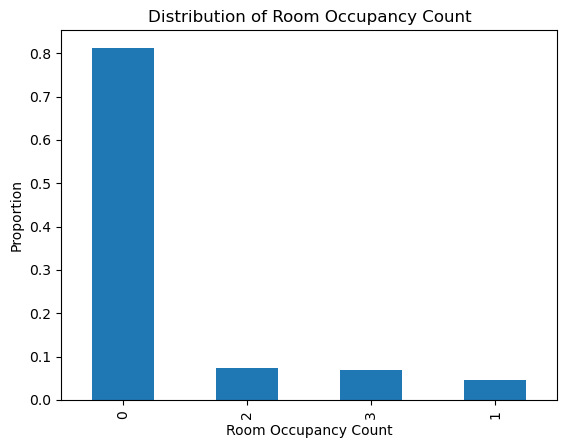

In [46]:
# Check the distribution of the Room_Occupancy_Count
occupancy_distribution = df['Room_Occupancy_Count'].value_counts(normalize=True)
print(occupancy_distribution)

# Plot the distribution
occupancy_distribution.plot(kind='bar')
plt.xlabel('Room Occupancy Count')
plt.ylabel('Proportion')
plt.title('Distribution of Room Occupancy Count')
plt.show()

The data is imbalanced, we can use XGBoost to handle the problem


[0]	validation_0-mlogloss:0.86272
[1]	validation_0-mlogloss:0.59319
[2]	validation_0-mlogloss:0.42311
[3]	validation_0-mlogloss:0.30865
[4]	validation_0-mlogloss:0.22807
[5]	validation_0-mlogloss:0.17071
[6]	validation_0-mlogloss:0.12947
[7]	validation_0-mlogloss:0.09976
[8]	validation_0-mlogloss:0.07815
[9]	validation_0-mlogloss:0.06245
[10]	validation_0-mlogloss:0.05038
[11]	validation_0-mlogloss:0.04162
[12]	validation_0-mlogloss:0.03511
[13]	validation_0-mlogloss:0.02999
[14]	validation_0-mlogloss:0.02621
[15]	validation_0-mlogloss:0.02331
[16]	validation_0-mlogloss:0.02127
[17]	validation_0-mlogloss:0.01968
[18]	validation_0-mlogloss:0.01870
[19]	validation_0-mlogloss:0.01774
[20]	validation_0-mlogloss:0.01718
[21]	validation_0-mlogloss:0.01673
[22]	validation_0-mlogloss:0.01630
[23]	validation_0-mlogloss:0.01577
[24]	validation_0-mlogloss:0.01550
[25]	validation_0-mlogloss:0.01536
[26]	validation_0-mlogloss:0.01524
[27]	validation_0-mlogloss:0.01513
[28]	validation_0-mlogloss:0.0

c:\Users\peppe\anaconda3\envs\IoT_Occupancy_Estimation_py310\lib\site-packages\xgboost\core.py:158: UserWarning: [09:39:56] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[72]	validation_0-mlogloss:0.01618
[73]	validation_0-mlogloss:0.01620
[74]	validation_0-mlogloss:0.01628
[75]	validation_0-mlogloss:0.01628
[76]	validation_0-mlogloss:0.01623
[77]	validation_0-mlogloss:0.01628
[78]	validation_0-mlogloss:0.01636
[79]	validation_0-mlogloss:0.01641
[80]	validation_0-mlogloss:0.01641
[81]	validation_0-mlogloss:0.01646
[82]	validation_0-mlogloss:0.01647
[83]	validation_0-mlogloss:0.01654
[84]	validation_0-mlogloss:0.01651
[85]	validation_0-mlogloss:0.01660
[86]	validation_0-mlogloss:0.01662
[87]	validation_0-mlogloss:0.01661
[88]	validation_0-mlogloss:0.01664
[89]	validation_0-mlogloss:0.01668
[90]	validation_0-mlogloss:0.01672
[91]	validation_0-mlogloss:0.01674
[92]	validation_0-mlogloss:0.01672
[93]	validation_0-mlogloss:0.01676
[94]	validation_0-mlogloss:0.01682
[95]	validation_0-mlogloss:0.01686
[96]	validation_0-mlogloss:0.01692
[97]	validation_0-mlogloss:0.01696
[98]	validation_0-mlogloss:0.01694
[99]	validation_0-mlogloss:0.01693
Validation Accuracy:

c:\Users\peppe\anaconda3\envs\IoT_Occupancy_Estimation_py310\lib\site-packages\xgboost\core.py:158: UserWarning: [09:39:56] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


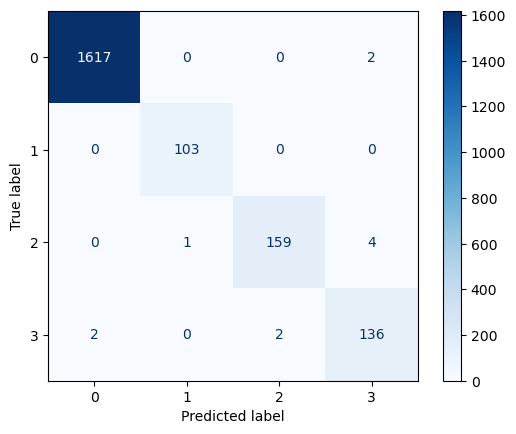

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define features and target
X = df.drop('Room_Occupancy_Count', axis=1)
y = df['Room_Occupancy_Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model on the training data
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)
xgb_model.set_params(early_stopping_rounds=10)

# Predict the classes on the validation data
y_val_pred = xgb_model.predict(X_val)

# Evaluate the model on the validation set
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Predict the classes on the test data
y_test_pred = xgb_model.predict(X_test)

# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()



Use the built-in save_model method from XGBoost to export the trained model:


In [48]:

# Save the model using pickle
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)